In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from datetime import timedelta
from notebook_utils import NotebookUtilities
from pandas import DataFrame
import humanize
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(832366, 109)



# Triage Efficiency

(how long it takes to triage the scene) What record in the FRVRS log is there that shows that the scene triage is complete?

In [4]:

# Investigate the presence of still patients
fn = lambda x: 'still' in str(x).lower()
srs = frvrs_logs_df.applymap(fn, na_action='ignore').sum()
columns_list = srs[srs != 0].index.tolist()
print(columns_list)

mask_series = frvrs_logs_df.voice_capture_message.map(fn)
df = frvrs_logs_df[mask_series]
if df.shape[0]: print(df.sample(min(5, df.shape[0])).voice_capture_message.unique().tolist())

mask_series = frvrs_logs_df.voice_command_command_description.map(fn)
df = frvrs_logs_df[mask_series]
if df.shape[0]: print(df.sample(min(5, df.shape[0])).voice_command_command_description.unique().tolist())

for cn in columns_list:
    print(cn)
    mask_series = frvrs_logs_df[cn].map(fn)
    df = frvrs_logs_df[mask_series]
    
    # Display a sample of the data frame, dropping columns with all NaN values and transposing it
    display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

['patient_demoted_sort', 'voice_capture_message', 'voice_command_message', 'voice_command_command_description', 'patient_record_sort', 'patient_engaged_sort']
['still breathing unresponsive', "it's still good", 'her still gonna tag him', "when you're packing it Yup be still red", 'um but still seems to be breathing OK and']
["OK it's still tacky OK i don't see any other injuries we're gonna do immediate when they get here OK and now", 'hold still', 'OK can i check his breathing and his pulse OK hold still', "no it's not hurt anywhere else that I'm not sure of so I would still", "yeah I know what you got Yep you need some immediate help real quick with a tourniquet as well we shall control your hemorrhage hopefully that works for you you have a [PERSON] can't do much about that I'll talk to you later Sir why are you still standing can you sit down congratulations you do not pass go"]
patient_demoted_sort


,836,404518,40369,84349
action_type,PATIENT_DEMOTED,PATIENT_DEMOTED,PATIENT_DEMOTED,PATIENT_DEMOTED
elapsed_time,226050,9926,146722,170265
event_time,2023-03-10 08:18:17,2022-03-16 12:53:10,2023-03-14 13:30:54,2023-04-20 08:50:25
session_uuid,040ba585-ccae-45ef-b4bd-a0e35ec222b0,b1ebfdc9-6338-4b80-ba76-947f8690bd91,fe2602f0-e9e8-4913-8bf3-806852ce738a,788af03e-aeee-4d53-8c97-f0060df61932
file_name,All CSV files renamed by date/03.10.23.0814.csv,Disaster Day 2022/MO_0101.csv,All CSV files renamed by date/03.14.23.1339.csv,All CSV files renamed by date/04.20.23.0850.csv
logger_version,1.3,1.3,1.3,1.3
time_group,1,0,1,1
patient_demoted_health_level,100,100,100,100
patient_demoted_health_time_remaining,0,Infinity,0,Infinity
patient_demoted_id,Gary_3 Root,Bob_0 Root,Gary_3 Root,Bob_0 Root


voice_capture_message


,181403,101157,750595,115425
action_type,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE
elapsed_time,326579,262776,508224,208321
event_time,2023-08-02 12:54:05,2023-04-20 13:12:24,2023-06-23 10:05:00,2023-04-25 11:35:59
session_uuid,684d04c4-83c1-49b6-b798-ddd431438857,20168f93-040c-4290-aa7e-2b197825c9de,7de52180-d823-4f9e-9003-aeab8139970b,33f3d2d4-49b4-43cf-80d4-cd7d5993aca4
file_name,DCEMS Round 2 only triage sessions/684d04c4-83...,All CSV files renamed by date/04.20.23.1321.csv,v.1.0/clean-7de52180-d823-4f9e-9003-aeab813997...,All CSV files renamed by date/04.25.23.1132.csv
logger_version,1.0,1.3,1.0,1.3
time_group,1,1,2,1
voice_capture_message,bleeding is controlled I'm still gonna make hi...,so now we treated that external but he's still OK,still here well I've been here,still pretty tacky but the bleeding seems it c...
voice_capture_command_description,NaN,NA,NaN,NA


voice_command_message


,101582,145848,706897,92224
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,602879,278843,218468,288101
event_time,2023-04-20 13:18:04,2022-12-07 08:09:31,2023-03-07 11:33:00,2023-04-20 11:39:29
session_uuid,20168f93-040c-4290-aa7e-2b197825c9de,e77c15e0-d0de-413d-a471-20a285e81387,524d5418-62f4-4834-9f1e-47202c30e667,30d6a023-e0a3-4678-9ef2-6011964d225a
file_name,All CSV files renamed by date/04.20.23.1321.csv,All CSV files renamed by date/12.07.22.0813.csv,v.1.0/Clean Marty16.csv,All CSV files renamed by date/04.20.23.1147.csv
logger_version,1.3,1.0,1.0,1.3
time_group,2,1,1,1
voice_command_message,hold still,hold still,hold still,hold still
voice_command_command_description,stay still,hold still,hold still,hold still


voice_command_command_description


,107862,173183,41384,817123
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,327301,154730,464237,345135
event_time,2023-04-25 10:18:45,2023-08-08 13:41:25,2023-03-14 13:57:09,2023-04-21 11:44:00
session_uuid,16359508-f91b-4f85-baeb-dade7d574a61,36ebe99c-dcda-4677-945c-cb05f312d61c,1663640c-5a60-4fa6-8bf4-249f41a693a5,6909d3b6-a43a-4d26-8c83-9bd8a5ea569f
file_name,All CSV files renamed by date/04.25.23.1013.csv,DCEMS Round 2 only triage sessions/36ebe99c-dc...,All CSV files renamed by date/03.14.23.1403.csv,v.1.0/clean-max3.csv
logger_version,1.0,1.3,1.3,1.0
time_group,1,0,2,1
voice_command_message,hold still,sit up/down,anywhere else,stand up
voice_command_command_description,what the heck do you got here dude hey hold ho...,go ahead and sit still for a second,still going alright sir do you have any other ...,I do but I thought we could still talk to them...


patient_record_sort


,114117,170009,713171,22918
action_type,PATIENT_RECORD,PATIENT_RECORD,PATIENT_RECORD,PATIENT_RECORD
elapsed_time,407797,44053,350889,641396
event_time,2023-04-25 11:12:12,2023-08-10 12:25:59,2023-03-07 14:14:00,2023-03-14 09:09:09
session_uuid,ee694b2c-dad2-4b9a-acc9-4e025e1b299b,20e5782a-d6f7-4361-a590-7e710c176765,b878d528-37a0-4175-a294-16c4de1fd5eb,c598ce3a-f613-4d50-8a2f-96cfab35de1c
file_name,All CSV files renamed by date/04.25.23.1105.csv,DCEMS Round 2 only triage sessions/20e5782a-d6...,v.1.0/Clean Marty22.csv,All CSV files renamed by date/03.14.23.0914.csv
logger_version,1.0,1.3,1.0,1.3
time_group,2,1,2,2
patient_record_health_level,100,100,100,100
patient_record_health_time_remaining,0,0,0,128
patient_record_id,Gary_3 Root,Gary_3 Root,Gary_3 Root,Mike_6 Root


patient_engaged_sort


,15769,180045,43911,683832
action_type,PATIENT_ENGAGED,PATIENT_ENGAGED,PATIENT_ENGAGED,PATIENT_ENGAGED
elapsed_time,114209,83810,417689,798187
event_time,2023-03-10 10:28:29,2023-08-01 10:01:43,2023-03-14 14:41:23,2023-05-23 09:43:00
session_uuid,1cfebb9a-6000-4742-81be-6103ebe168bc,5e1e1072-2244-4473-996d-e2cb337b805b,5de8dcc6-c6ab-43e5-9103-85c8d069cf4b,47bb9911-6096-4703-8551-4a0f8cb1063a
file_name,All CSV files renamed by date/03.10.23.1026.csv,DCEMS Round 2 only triage sessions/5e1e1072-22...,All CSV files renamed by date/03.14.23.1447.csv,v.1.0/Clean 47bb9911-6096-4703-8551-4a0f8cb106...
logger_version,1.3,1.0,1.3,1.0
time_group,1,1,2,2
patient_engaged_health_level,100,100,100,100
patient_engaged_health_time_remaining,128,Infinity,Infinity,Infinity
patient_engaged_id,Mike_3 Root,Bob_0 Root,Gary_1 Root,Gary_1 Root


In [5]:

# Show examples of "still" records from the sort columns
sort_columns_list = [cn for cn in frvrs_logs_df.columns if cn.endswith('_sort')]
mask_series = False
for cn in sort_columns_list: mask_series |= (frvrs_logs_df[cn] == 'still')
df = frvrs_logs_df[mask_series]

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,32980,820664,204727,171900
action_type,PATIENT_DEMOTED,PATIENT_RECORD,PATIENT_DEMOTED,PATIENT_DEMOTED
elapsed_time,360297,15814,6247,3453
event_time,2023-03-14 11:42:43,2023-04-21 08:36:00,2023-08-03 08:24:41,2023-08-08 10:07:08
session_uuid,13839608-6085-4a88-a8f2-74af9fd06a05,736e625b-bb07-452c-9302-b37bb27cbf43,ed079161-e1ea-4682-9abb-d0b1736e3ee5,25de35e0-354f-4785-9738-31c44e37fcbc
file_name,All CSV files renamed by date/03.14.23.1154.csv,v.1.0/clean-max7.csv,DCEMS Round 2 only triage sessions/ed079161-e1...,DCEMS Round 2 only triage sessions/25de35e0-35...
logger_version,1.3,1.0,1.0,1.0
time_group,1,1,0,0
patient_demoted_health_level,100,NaN,100,100
patient_demoted_health_time_remaining,0,NaN,0,Infinity
patient_demoted_id,Gary_3 Root,NaN,Gary_3 Root,Bob_0 Root


In [6]:

# Get the time that all still patients are engaged
if nu.pickle_exists('still_patients_df'):
    still_patients_df = nu.load_object('still_patients_df')
else:
    groupby_columns = ['session_uuid', 'time_group']
    gb = frvrs_logs_df.sort_values(['elapsed_time']).groupby(groupby_columns)
    action_types_list = [
        'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
        'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
        'TOOL_DISCARDED'
    ]
    command_messages_list = [
        'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
        'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
    ]
    rows_list = []
    for (session_uuid, time_group), df1 in gb:
        logger_version = df1.logger_version.unique().item()
        
        # Get list of patients in a time group that are still
        mask_series = False
        for cn in sort_columns_list: mask_series |= (df1[cn] == 'still')
        still_list = df1[mask_series].patient_id.unique().tolist()
    
        # Get the list of first engagements with all still patients
        for patient_id in still_list:
            row_dict = {}
            row_dict['logger_version'] = logger_version
            for cn in groupby_columns: row_dict[cn] = eval(cn)
            row_dict['patient_id'] = patient_id
            
            # Get the patient's first notice
            patient_mask_series = (df1.patient_id == patient_id)
            first_notice = df1[patient_mask_series].elapsed_time.min()
            row_dict['first_notice'] = first_notice
            
            # Get the first action with the patient
            mask_series = patient_mask_series & df1.action_type.isin(action_types_list)
            mask_series |= ((df1.action_type == 'VOICE_COMMAND') & (df1.voice_command_message.isin(command_messages_list)))
            first_action = df1[mask_series].elapsed_time.min()
            row_dict['first_action'] = first_action
            
            # Get the patient's first engagement
            mask_series = patient_mask_series & (df1.action_type == 'PATIENT_ENGAGED')
            df2 = df1[mask_series]
            if df2.shape[0]:
                first_engagement = df2.elapsed_time.min()
                notice_to_engagement = first_engagement - first_notice
                action_to_engagement = first_engagement - first_action
            else:
                first_engagement = np.nan
                notice_to_engagement = np.nan
                action_to_engagement = np.nan
            row_dict['first_engagement'] = first_engagement
            row_dict['notice_to_engagement'] = notice_to_engagement
            row_dict['action_to_engagement'] = action_to_engagement
            
            rows_list.append(row_dict)
    still_patients_df = DataFrame(rows_list)
    nu.store_objects(still_patients_df=still_patients_df)

In [7]:

# Get the time to engage all stills
groupby_columns = ['session_uuid', 'time_group']
max_first_engagement_df = still_patients_df.groupby(groupby_columns).filter(
    lambda df: not df.first_engagement.isnull().any()
).groupby(groupby_columns).max().reset_index(drop=False).sort_values('first_engagement')
df = max_first_engagement_df.rename(
    columns={k: 'max_' + k for k in max_first_engagement_df.columns if k not in groupby_columns}
)

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,106,11,155,52
session_uuid,45118b95-412c-4a2d-9373-8f7da3428ca8,06574b6f-ab02-432c-9a65-7b031218a270,6925e2d8-3f2b-443d-8e59-7bac6684464d,21577c78-0085-4962-a363-b88526e3c212
time_group,2,12,2,1
max_logger_version,1.0,1.0,1.0,1.3
max_patient_id,Gary_3 Root,Gary_3 Root,Gary_3 Root,Gary_3 Root
max_first_notice,254739,3581867,252531,30657
max_first_action,267546.0,3588604.0,262134.0,38150.0
max_first_engagement,415632.0,3683720.0,493315.0,268633.0
max_notice_to_engagement,160893.0,101853.0,240784.0,237976.0
max_action_to_engagement,148086.0,95116.0,231181.0,230483.0


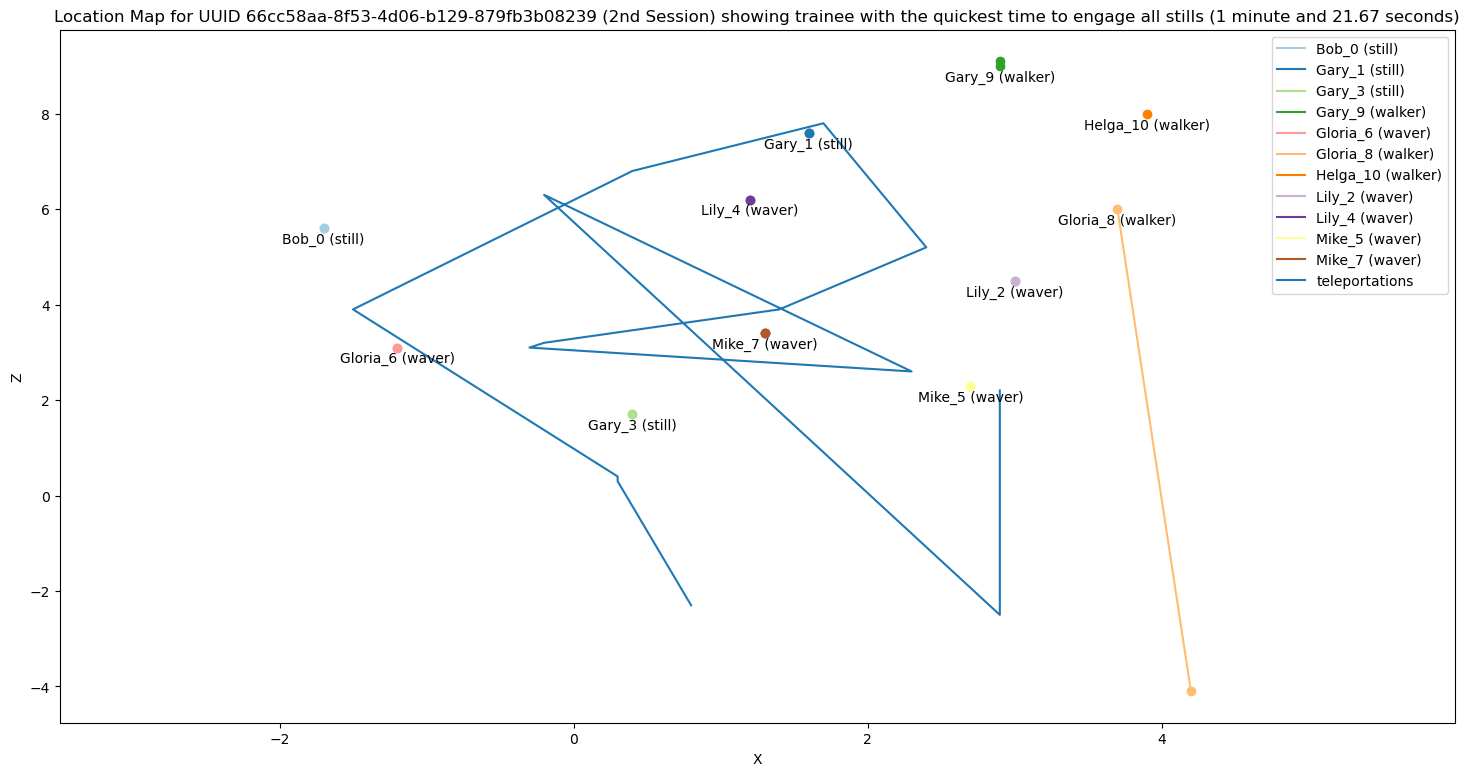

In [8]:

# Get time group with the quickest time to engage all stills
df = max_first_engagement_df.head(1)
if df.shape[0]:
    session_uuid = df.session_uuid.squeeze()
    time_group = df.time_group.squeeze()
    base_mask_series = (frvrs_logs_df.session_uuid == session_uuid) & (frvrs_logs_df.time_group == time_group)
    
    title = f'Location Map for UUID {session_uuid} ({humanize.ordinal(time_group+1)} Session)'
    title += ' showing trainee with the quickest time to engage all stills ('
    first_engagement = df.first_engagement.min()
    title += humanize.precisedelta(timedelta(milliseconds=first_engagement)) + ')'
    nu.visualize_player_movement(base_mask_series, title=title, frvrs_logs_df=frvrs_logs_df)


## In looking at the maps, does a small footprint correlate to efficient performance?

In [9]:

# Create a euclidean footprint measure
if nu.pickle_exists('euclidean_footprint_df'):
    euclidean_footprint_df = nu.load_object('euclidean_footprint_df')
else:
    df1 = max_first_engagement_df.rename(
        columns={k: 'max_' + k for k in max_first_engagement_df.columns if k not in groupby_columns}
    )
    groupby_columns = ['session_uuid', 'time_group', 'max_first_engagement']
    gb = df1.groupby(groupby_columns)
    rows_list = []
    for (session_uuid, time_group, max_first_engagement), df2 in gb:
        # display(df2.T)
        
        # Filter for this specific time group
        session_mask = True
        for cn in groupby_columns[:-1]: session_mask &= (frvrs_logs_df[cn] == eval(cn))
        
        # Add locations to the dimension variables
        mask_series = (frvrs_logs_df.action_type == 'PLAYER_LOCATION') & session_mask
        locations_df = frvrs_logs_df[mask_series]
        
        # Add teleportations to the dimension variables
        mask_series = (frvrs_logs_df.action_type == 'TELEPORT') & session_mask
        teleports_df = frvrs_logs_df[mask_series]
        
        # Add the teleports_df DataFrame to the bottom of the locations_df DataFrame
        combined_df = pd.concat([
            locations_df.rename(columns={'player_location_location': 'player_location'}),
            teleports_df.rename(columns={'teleport_location': 'player_location'})
        ], ignore_index=True)

        # Get the xyz coords sorted by elapsed time
        x_dim = []; y_dim = []; z_dim = []
        if combined_df.shape[0]:
            combined_df = combined_df.sort_values(['elapsed_time'])
            for player_location in combined_df.player_location:
                player_location = eval(player_location)
                x_dim.append(player_location[0])
                y_dim.append(player_location[1])
                z_dim.append(player_location[2])
        
        # Starting from (0,0,0), sum the Euclidean distances
        first_point = '(0, 0, 0)'
        euclidean_distance = 0
        for (x, y, z) in zip(x_dim, y_dim, z_dim):
            second_point = f'({x}, {y}, {z})'
            euclidean_distance += nu.get_euclidean_distance(second_point, first_point=first_point)
            first_point = second_point
        # print(euclidean_distance)
        row_dict = {}
        for cn in groupby_columns: row_dict[cn] = eval(cn)
        row_dict['euclidean_distance'] = euclidean_distance
        rows_list.append(row_dict)
    euclidean_footprint_df = DataFrame(rows_list)
    nu.store_objects(euclidean_footprint_df=euclidean_footprint_df)

In [10]:

[f'euclidean_footprint_df.{fn}' for fn in dir(euclidean_footprint_df) if 'plot' in fn]

['euclidean_footprint_df.boxplot', 'euclidean_footprint_df.plot']

In [89]:

df = euclidean_footprint_df.corr()
y = 'euclidean_distance'
mask_series = (df.index == y)
x = 'max_first_engagement'
c = df[mask_series][x].squeeze()
print(f'The correlation of {y} to {x} is about {c}, so no.')

The correlation of euclidean_distance to max_first_engagement is about 0.006695789823206764, so no.


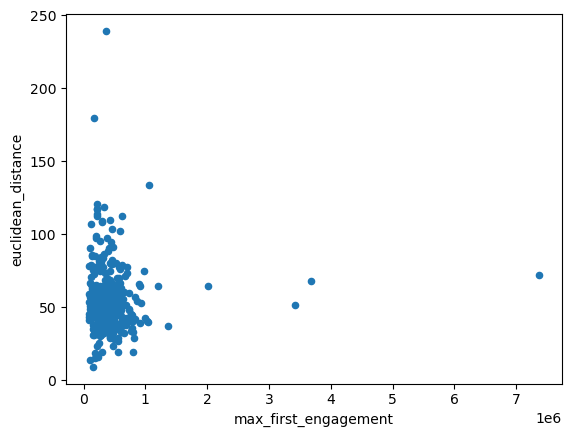

In [12]:

euclidean_footprint_df.plot(x='max_first_engagement', y='euclidean_distance', kind='scatter');

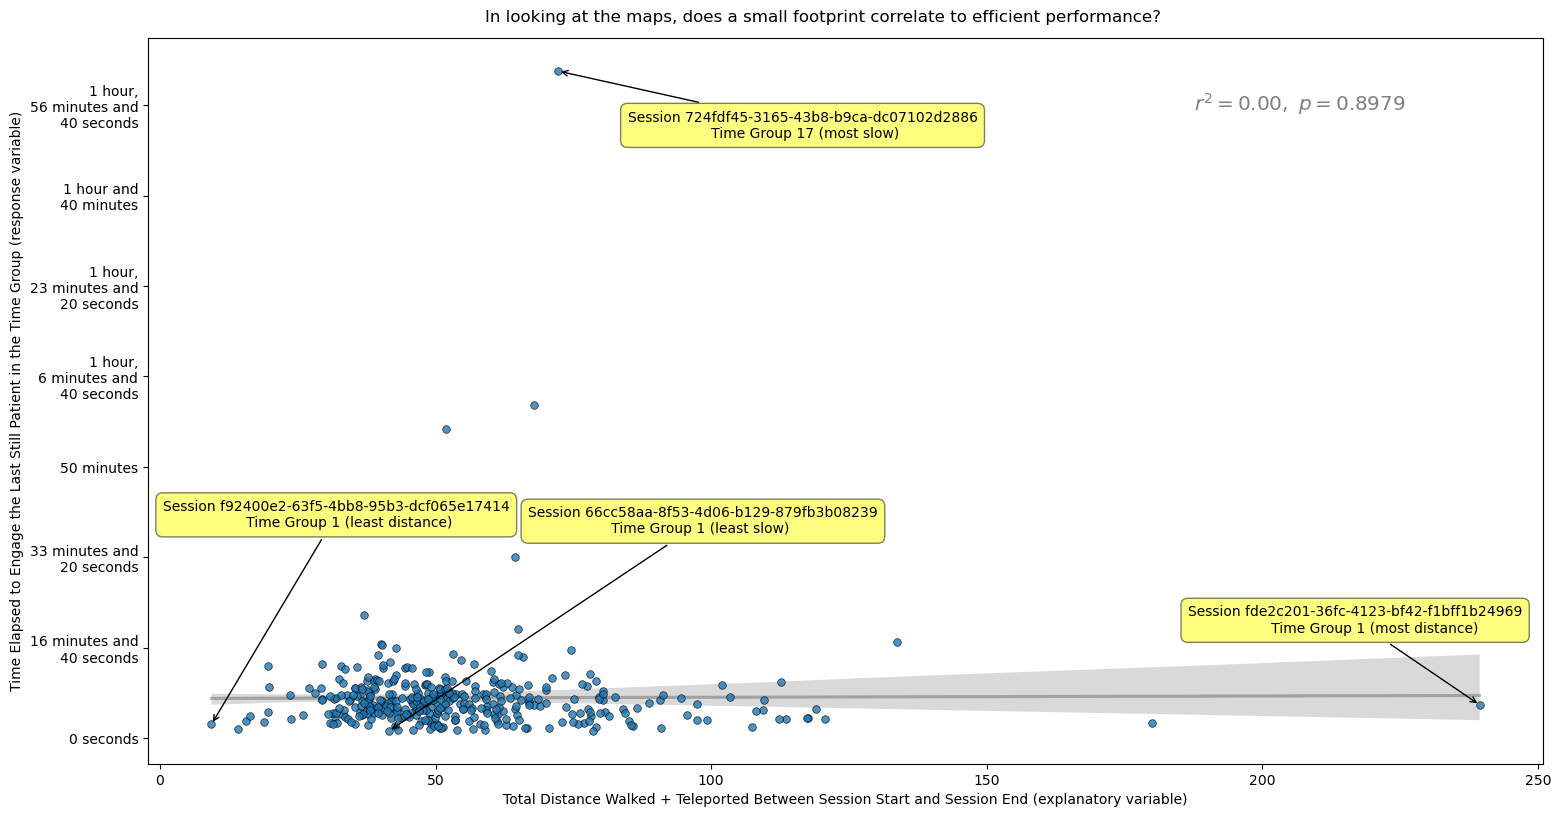

In [91]:

groupby_columns = ['session_uuid', 'time_group']
df = euclidean_footprint_df.set_index(groupby_columns)
df.index = pd.Index([f'Session {idx_tuple[0]}\n                   Time Group {idx_tuple[1]}' for idx_tuple in df.index.tolist()])
fig = nu.first_order_linear_scatterplot(
    df,
    'euclidean_distance',
    'max_first_engagement',
    xlabel_str='Total Distance Walked + Teleported Between Session Start and Session End (explanatory variable)',
    ylabel_str='Time Elapsed to Engage the Last Still Patient in the Time Group (response variable)',
    x_adj='distance',
    y_adj='slow',
    title='In looking at the maps, does a small footprint correlate to efficient performance?',
    idx_reference=None,
    annot_reference=None,
    aspect_ratio=None,
    least_x_xytext=(-35, 140),
    most_x_xytext=(-210, 50),
    least_y_xytext=(100, 140),
    most_y_xytext=(50, -50),
    reference_xytext=None,
    color_list=None,
)
ax = fig.get_axes()[0]

# Humanize x tick labels
xticklabels_list = []
for text_obj in ax.get_xticklabels():
    text_obj.set_text(
        humanize.intword(int(text_obj.get_position()[0]))
    )
    xticklabels_list.append(text_obj)
ax.set_xticklabels(xticklabels_list)

# Humanize y tick labels
yticklabels_list = []
for text_obj in ax.get_yticklabels():
    text_obj.set_text(
        humanize.precisedelta(timedelta(milliseconds=text_obj.get_position()[1])).replace(', ', ',\n').replace(' and ', ' and\n')
    )
    yticklabels_list.append(text_obj)
ax.set_yticklabels(yticklabels_list);